# PCA Tests

In [5]:
# imports
import os
from importlib import reload
import numpy as np
import pandas
import datetime
import h5py

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from sklearn import decomposition

In [2]:
%matplotlib ipympl

# Load up the latent space

In [4]:
filename = 'MODIS_R2019_2004_95clear_128x128_latents_std.h5'
path = os.path.join(os.getenv('OS_SST'), 'MODIS_L2',
                    'Nenya', 'latents/MODIS_R2019_v4_REDO',
                    'SimCLR_resnet50_lr_0.05_decay_0.0001_bsz_256_temp_0.07_trial_5_cosine_warm')
fpath = os.path.join(path, filename)

In [9]:
f = h5py.File(fpath, 'r')
latents = f['valid'][:]
latents.shape

(759576, 256)

# PCA time

In [10]:
pca_fit = decomposition.PCA().fit(latents)

# Explained variance

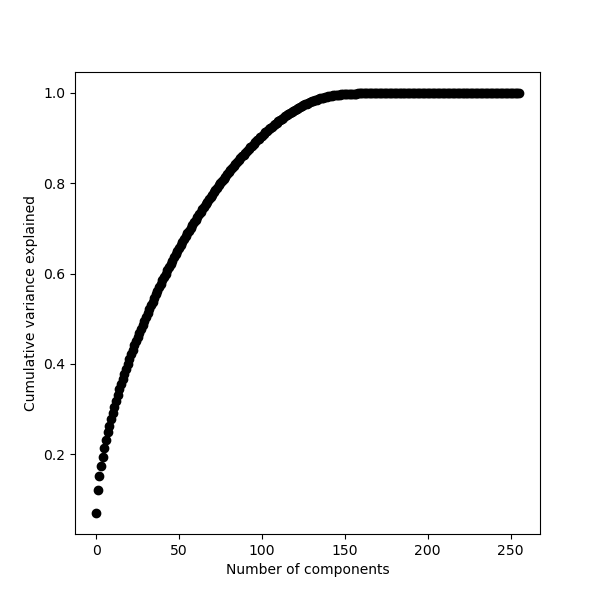

In [16]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
#
ax.plot(np.cumsum(pca_fit.explained_variance_ratio_), 'ok')
# Label
ax.set_ylabel('Cumulative variance explained')
ax.set_xlabel('Number of components')
#
#ax.set_xlim(0,10.)
log = False
if log:
    ax.set_xscale('log')
    ax.set_yscale('log')
#
plt.show()